In [3]:
import pandas as pd

In [4]:
# считаем описание данных
df = pd.read_csv('./data/02_otp_desc.csv', sep=';')

In [5]:
df = df.loc[:, "ПОЛЕ":"ОПИСАНИЕ"]

# в pole Series как из него вытащить строку
for idx, pole in df.iterrows():
    print(pole.get_values())

['AGREEMENT_RK' 'уникальный идентификатор объекта в выборке']
['TARGET'
 'целевая переменная:отклик на маркетинговую кампанию (1 - отклик был зарегистрирован, 0 - отклика не было)']
['AGE' 'возраст клиента']
['SOCSTATUS_WORK_FL'
 'социальный статус клиента относительно работы (1 - работает, 0 - не работает)']
['SOCSTATUS_PENS_FL'
 'социальный статус клиента относительно пенсии (1 - пенсионер, 0 - не пенсионер)']
['GENDER' 'пол клиента']
['CHILD_TOTAL' 'количество детей клиента']
['DEPENDANTS' 'количество иждивенцев клиента']
['EDUCATION' 'образование']
['MARITAL_STATUS' 'семейное положение']
['GEN_INDUSTRY' 'отрасль работы клиента']
['GEN_TITLE' 'должность']
['ORG_TP_STATE' 'форма собственности компании']
['ORG_TP_FCAPITAL' 'отношение к иностранному капиталу']
['JOB_DIR' 'направление деятельности в нутри компании']
['FAMILY_INCOME' 'семейный доход (несколько категорий)']
['PERSONAL_INCOME' 'личный доход клиента (в рублях)']
['REG_ADDRESS_PROVINCE' 'область регистрации клиента']
['FACT_

In [7]:
# считаем все-все данные
train = pd.read_csv('./data/02_otp_train.csv', sep=';')

In [8]:
train.shape

(15223, 52)

In [9]:
test = pd.read_csv('./data/02_otp_test.csv', sep=';')

In [10]:
test.head()

,AGREEMENT_RK,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59909969,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,Образование,...,0,1,2,2,8,0,0,0,0,NaN
1,59910420,48,0,1,1,0,0,Среднее,Состою в браке,NaN,...,0,0,2,1,15,0,0,0,0,NaN
2,59911223,35,1,0,0,1,0,Среднее,Не состоял в браке,Металлургия/Промышленность/Машиностроение,...,0,1,1,1,1,0,0,0,0,NaN
3,59911322,22,1,0,0,0,0,Среднее,Не состоял в браке,Другие сферы,...,0,1,3,2,9,0,0,0,0,NaN
4,59911438,27,1,0,1,2,2,Высшее,Состою в браке,Образование,...,0,1,1,1,5,0,0,0,0,NaN


In [11]:
test.shape

(14910, 51)

In [9]:
# отделим таргет от TRAIN-а

In [12]:
y = train['TARGET']

In [13]:
train = train.drop('TARGET', axis=1)

In [12]:
# соеденим train и test

In [14]:
all_data = pd.concat([train, test])

In [15]:
# необходимо удалить индекс, 
# у нас есть 0-строка в train и 0-строка в test (и так далее 1,2,3,4)
# если мы просто объеденим - у нас сохранятся индексы
# мы же просто уберем индекс и автоматически создастся новый индекс, сквозной и уникальный
all_data = all_data.reset_index(drop=True)

In [110]:
# посмотрим типы данных и их заполняемость

In [16]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_P

In [112]:
# Видим, что часть данных - object, скорее всего строки.
# Давайте выведем эти значения для каждого столбца

In [17]:
for i in all_data.columns: # перебираем все столбцы
    if str(all_data[i].dtype) == 'object': # если тип столбца - object
        print(i) # выводим название столбца
        print(set(all_data[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print() # выводим пустую строку

EDUCATION
{'Два и более высших образования', 'Среднее', 'Среднее специальное', 'Неполное среднее', 'Высшее', 'Ученая степень', 'Неоконченное высшее'}

MARITAL_STATUS
{'Гражданский брак', 'Не состоял в браке', 'Состою в браке', 'Разведен(а)', 'Вдовец/Вдова'}

GEN_INDUSTRY
{nan, 'Транспорт', 'Нефтегазовая промышленность', 'Туризм', 'Развлечения/Искусство', 'Сборочные производства', 'Информационные услуги', 'Ресторанный бизнес/Общественное питание', 'Химия/Парфюмерия/Фармацевтика', 'Информационные технологии', 'Коммунальное хоз-во/Дорожные службы', 'Строительство', 'Образование', 'Банк/Финансы', 'Здравоохранение', 'Юридические услуги/нотариальные услуги', 'Салоны красоты и здоровья', 'Подбор персонала', 'СМИ/Реклама/PR-агенства', 'Недвижимость', 'Энергетика', 'Наука', 'Логистика', 'Торговля', 'Другие сферы', 'Маркетинг', 'Сельское хозяйство', 'Управляющая компания', 'ЧОП/Детективная д-ть', 'Металлургия/Промышленность/Машиностроение', 'Страхование', 'Государственная служба'}

GEN_TITLE
{na

In [114]:
# можно заметить что некоторые переменные, 
# которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа,
# но по какой-то (ниже увидим) причине были распознаны как строки

In [18]:
all_data['PERSONAL_INCOME'] = all_data['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [116]:
# причина же что использовалась запятая для разделения не целой части числа

In [19]:
all_data['CREDIT'] = all_data['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['FST_PAYMENT'] = all_data['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_AVG_DLQ_AMT'] = all_data['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_MAX_DLQ_AMT'] = all_data['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

In [118]:
# запускаем повторно код и смотрим, какие столбцы с какими строковыми значениями остались

In [20]:
for i in all_data.columns:
    if str(all_data[i].dtype) == 'object':
        print(i)
        print(set(all_data[i]))
        print()

EDUCATION
{'Два и более высших образования', 'Среднее', 'Среднее специальное', 'Неполное среднее', 'Высшее', 'Ученая степень', 'Неоконченное высшее'}

MARITAL_STATUS
{'Гражданский брак', 'Не состоял в браке', 'Состою в браке', 'Разведен(а)', 'Вдовец/Вдова'}

GEN_INDUSTRY
{nan, 'Транспорт', 'Нефтегазовая промышленность', 'Туризм', 'Развлечения/Искусство', 'Сборочные производства', 'Информационные услуги', 'Ресторанный бизнес/Общественное питание', 'Химия/Парфюмерия/Фармацевтика', 'Информационные технологии', 'Коммунальное хоз-во/Дорожные службы', 'Строительство', 'Образование', 'Банк/Финансы', 'Здравоохранение', 'Юридические услуги/нотариальные услуги', 'Салоны красоты и здоровья', 'Подбор персонала', 'СМИ/Реклама/PR-агенства', 'Недвижимость', 'Энергетика', 'Наука', 'Логистика', 'Торговля', 'Другие сферы', 'Маркетинг', 'Сельское хозяйство', 'Управляющая компания', 'ЧОП/Детективная д-ть', 'Металлургия/Промышленность/Машиностроение', 'Страхование', 'Государственная служба'}

GEN_TITLE
{na

# Данные готовы, теперь вам предлагается начать решать задачу

In [62]:
# Есть ли пропуски в данных? что с ними сделать?

# Заполняем пропуски по PREVIOUS_CARD_NUM_UTILIZED. Nan is 0
t_data = all_data.copy()
# Удаляем столбец, думаю этот признак не играет роли, к тому же очень много пропусков
t_data = t_data.drop("PREVIOUS_CARD_NUM_UTILIZED", axis=1)

t_data["GEN_INDUSTRY"] = t_data["GEN_INDUSTRY"].fillna(value="Неопределенно")
t_data["GEN_TITLE"] = t_data["GEN_TITLE"].fillna(value="Неопределенно")
t_data["ORG_TP_STATE"] = t_data["ORG_TP_STATE"].fillna(value="Неопределенно")
t_data["ORG_TP_FCAPITAL"] = t_data["ORG_TP_FCAPITAL"].fillna(value="Неопределенно")
t_data["JOB_DIR"] = t_data["JOB_DIR"].fillna(value="Неопределенно")
t_data["TP_PROVINCE"] = t_data["TP_PROVINCE"].fillna(value="Неопределенно")
t_data["REGION_NM"] = t_data["REGION_NM"].fillna(value="Неопределенно")
t_data["WORK_TIME"] = t_data["WORK_TIME"].fillna(value=-100)

t_data.info()
# t_data["PREVIOUS_CARD_NUM_UTILIZED"] = t_data["PREVIOUS_CARD_NUM_UTILIZED"].fillna(value=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 50 columns):
AGREEMENT_RK               30133 non-null int64
AGE                        30133 non-null int64
SOCSTATUS_WORK_FL          30133 non-null int64
SOCSTATUS_PENS_FL          30133 non-null int64
GENDER                     30133 non-null int64
CHILD_TOTAL                30133 non-null int64
DEPENDANTS                 30133 non-null int64
EDUCATION                  30133 non-null object
MARITAL_STATUS             30133 non-null object
GEN_INDUSTRY               30133 non-null object
GEN_TITLE                  30133 non-null object
ORG_TP_STATE               30133 non-null object
ORG_TP_FCAPITAL            30133 non-null object
JOB_DIR                    30133 non-null object
FAMILY_INCOME              30133 non-null object
PERSONAL_INCOME            30133 non-null float64
REG_ADDRESS_PROVINCE       30133 non-null object
FACT_ADDRESS_PROVINCE      30133 non-null object
POSTAL_ADDRESS_

In [63]:

# Как поступить со строковыми переменными?
t_data = pd.get_dummies(t_data, columns=[
    'EDUCATION', 
    'MARITAL_STATUS', 
    'GEN_INDUSTRY',
    'GEN_TITLE',   
    'ORG_TP_STATE',
    'ORG_TP_FCAPITAL',            
    'JOB_DIR',           
    'FAMILY_INCOME',
    'REG_ADDRESS_PROVINCE',
    'FACT_ADDRESS_PROVINCE',
    'POSTAL_ADDRESS_PROVINCE',
    'TP_PROVINCE',
    'REGION_NM',
])
# Ваш код :-)


In [64]:
# В итоге должны получиться данные без пропусков и только числовые
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 449 entries, AGREEMENT_RK to REGION_NM_ЮЖНЫЙ
dtypes: float64(6), int64(31), uint8(412)
memory usage: 20.3 MB


In [67]:
# Вновь разделите на train и test (не мешая)
# t_data.
data_train = t_data[0:y.shape[0]]
data_test = t_data[y.shape[0]:]
# Ваш код :-)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14910 entries, 15223 to 30132
Columns: 449 entries, AGREEMENT_RK to REGION_NM_ЮЖНЫЙ
dtypes: float64(6), int64(31), uint8(412)
memory usage: 10.1 MB


In [110]:
# Сделать hold-out sampling на train выборке
from sklearn.model_selection import train_test_split

# test_size=0.3, random_state=42
X_train, X_test, y_train, y_test = train_test_split(data_train, y, test_size=0.3, random_state=42)
# Ваш код :-)


In [131]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [119]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier() # у квалификатора есть своё случайное значение.
dtc.fit(X_train, y_train)
predict_dtc = dtc.predict(X_test)
# Ваш код :-)

In [120]:
print('precision', precision_score(y_test, predict_dtc))
print('recall', recall_score(y_test, predict_dtc))
print('accuracy', accuracy_score(y_test, predict_dtc))
print('f1', f1_score(y_test, predict_dtc))

precision 0.1660839160839161
recall 0.17117117117117117
accuracy 0.7948324939785417
f1 0.16858917480035496


In [121]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict_rfc = rfc.predict(X_test)

In [125]:
print('precision', precision_score(y_test, predict_rfc))
print('recall', recall_score(y_test, predict_rfc))
print('accuracy', accuracy_score(y_test, predict_rfc))
print('f1', f1_score(y_test, predict_rfc))

precision 0.45454545454545453
recall 0.009009009009009009
accuracy 0.8782570615283556
f1 0.0176678445229682


In [126]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)
predict_lg = lg.predict(X_test)

In [127]:
print('precision', precision_score(y_test, predict_lg))
print('recall', recall_score(y_test, predict_lg))
print('accuracy', accuracy_score(y_test, predict_lg))
print('f1', f1_score(y_test, predict_lg))

precision 0.0
recall 0.0
accuracy 0.8784760236479089
f1 0.0


/home/ssmarkin/zwork/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ssmarkin/zwork/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [128]:
# Посчитать метрики стандартные
# accuracy, precision, recall
# DONE SCROLL UP
# Ваш код :-)

/home/ssmarkin/zwork/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


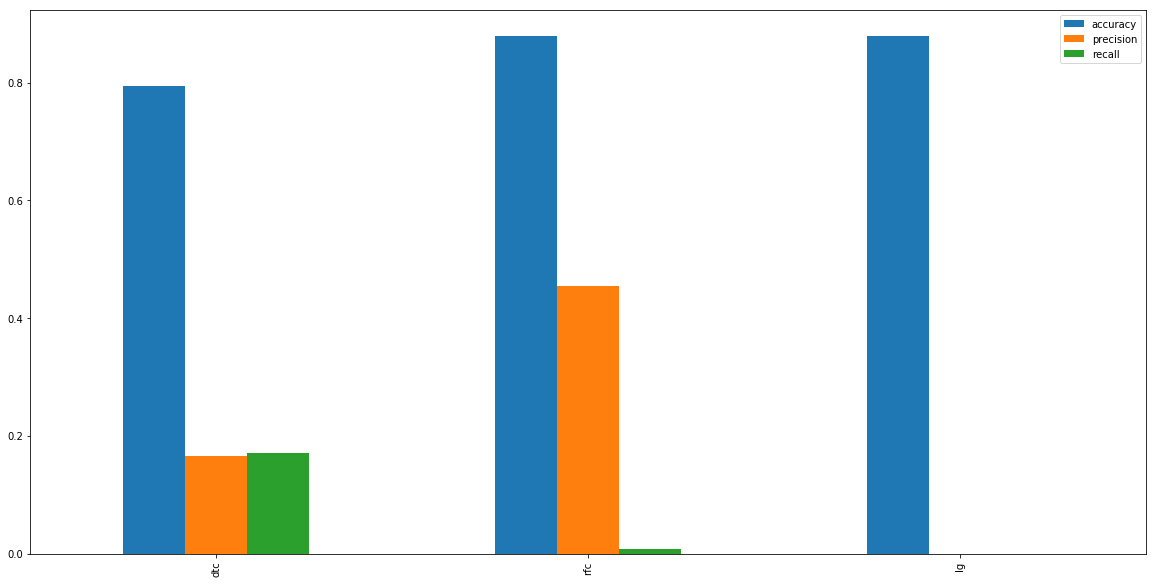

In [148]:
# Визуализировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns

result = pd.DataFrame(index=["dtc", "rfc", "lg"], data={
    "precision" : [
        precision_score(y_test, predict_dtc), 
        precision_score(y_test, predict_rfc),
        precision_score(y_test, predict_lg)
    ],
    "recall" : [
        recall_score(y_test, predict_dtc),
        recall_score(y_test, predict_rfc),
        recall_score(y_test, predict_lg),
    ],
    "accuracy" : [
        accuracy_score(y_test, predict_dtc),
        accuracy_score(y_test, predict_rfc),
        accuracy_score(y_test, predict_lg)
    ]
})

fig, ax = plt.subplots(figsize=(20,10))
result.plot(kind='bar', ax=ax)
# result.pivot_table().plot(kind='bar', ax=ax)
# Ваш код :-)

In [ ]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой моделе

# Ваш код :-)

In [ ]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

# Ваш код :-)

In [37]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

# Ваш код :-)